In [ ]:
!nvidia-smi

Tue Apr 26 20:31:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    44W / 350W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/google-research/long-range-arena.git

Cloning into 'long-range-arena'...
remote: Enumerating objects: 474, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 474 (delta 145), reused 137 (delta 137), pack-reused 316
Receiving objects: 100% (474/474), 145.27 KiB | 6.32 MiB/s, done.
Resolving deltas: 100% (328/328), done.


In [ ]:
#Execute if A100 is the current GPU

!pip3 install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:45tcmalloc: large alloc 1147494400 bytes == 0x39fb0000 @  0x7fa71fd9f615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:26tcmalloc: large alloc 1434370048 bytes == 0x7e606000 @  0x7fa71fd9f615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████           | 1336.2 MB 1.2 MB/s eta 0:09:31tcmalloc: large alloc 1792966656 bytes =

In [ ]:
!wget https://storage.googleapis.com/long-range-arena/lra_release.gz
!gzip -d lra_release.gz
!tar -xf lra_release

!pip install tensorflow_text

--2022-04-26 20:34:34--  https://storage.googleapis.com/long-range-arena/lra_release.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 108.177.13.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8288700910 (7.7G) [application/octet-stream]
Saving to: ‘lra_release.gz’

lra_release.gz      100%[===================>]   7.72G   151MB/s    in 58s     

2022-04-26 20:35:33 (136 MB/s) - ‘lra_release.gz’ saved [8288700910/8288700910]

     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 462 kB 76.9 MB/s 


In [ ]:
%cd /content/long-range-arena

import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

from lra_benchmarks.matching.input_pipeline import get_matching_datasets

batch_size=4
accumulation_steps=32 // batch_size
max_length=4000

LAMBDA = 0.0

train_dataset, valid_dataset, test_dataset, encoder = get_matching_datasets(1, None, tokenizer='char', data_dir='/content/lra_release/lra_release/tsv_data', batch_size=batch_size, max_length=max_length)

/content/long-range-arena
INFO:tensorflow:/content/lra_release/lra_release/tsv_data/new_aan_pairs.train.tsv


INFO:tensorflow:/content/lra_release/lra_release/tsv_data/new_aan_pairs.train.tsv


INFO:tensorflow:/content/lra_release/lra_release/tsv_data/new_aan_pairs.eval.tsv


INFO:tensorflow:/content/lra_release/lra_release/tsv_data/new_aan_pairs.eval.tsv


INFO:tensorflow:/content/lra_release/lra_release/tsv_data/new_aan_pairs.test.tsv


INFO:tensorflow:/content/lra_release/lra_release/tsv_data/new_aan_pairs.test.tsv


INFO:tensorflow:Finished getting dataset.


INFO:tensorflow:Finished getting dataset.


In [ ]:
sample1 = next(iter(train_dataset))
sample1, sample2 = sample1['inputs1'], sample1['inputs2']

for i in range(min(4, batch_size)):
  print(encoder.decode(sample1[i]))
  print(encoder.decode(sample2[i]))
  print()

b'1 Introduction  Part-of-speech (POS) tagging aims to assign each  word in a sentence with a proper tag indicating its  POS category. While a number of successful POS  tagging systems have been available for English  and many other languages, it is still a challenge to  develop a practical POS tagger for Chinese due to  its language-specific issues. Firstly, Chinese words  do not have a strict one-to-one correspondence between their POS categories and functions in a sentence. Secondly, an ambiguous Chinese word can  act as different POS categories in different contexts without changing its form. Thirdly, there are  many out-of-vocabulary (OOV) words in real Chinese text whose POS categories are not defined in  the dictionary used. All these factors make it much  more difficult to achieve a high-performance POS  tagger for Chinese.  Recent studies in Chinese POS tagging focus on  statistical or machine learning approaches with  either characters or words as basic units for tagging  (Ng

In [ ]:
import torch.nn as nn
import math

class TEmbedding(nn.Module):
  def __init__(self, num_embeddings, hidden_dim, seq_length=1024, padding_idx=0):
    super(TEmbedding, self).__init__()
    
    self.num_embeddings = num_embeddings
    self.hidden_dim=hidden_dim
    self.seq_length = seq_length
    self.padding_idx = padding_idx

    self.embedding = nn.Embedding(num_embeddings, hidden_dim, padding_idx)
    self.pos_embeds  = nn.Parameter(torch.zeros(1, self.seq_length, self.hidden_dim))

    self.cls = nn.Parameter(torch.zeros(1, 1, self.hidden_dim)) #!!!!!!! INIT WITH ANOTHER VALUE IF REQUIRED

  def forward(self, input):
    batch_size, seq_len = input.shape
    
    embed = self.embedding(input)
    embed = embed + self.pos_embeds
    embed = torch.cat([ self.cls.expand(batch_size, 1, -1), embed ], axis=1)

    return embed
    
class TAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(TAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads
    
    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads

    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    q = torch.mul(q, 1. / torch.sqrt(torch.tensor(self.qkv_dim)))

    qk = torch.matmul(q, k.transpose(-1, -2))
    qk = nn.Softmax(dim=-1)(qk)

    def assertion_function(tsr):
      tsr = torch.sum(tsr, axis=-1)
      tsr = tsr - torch.ones_like(tsr)
      return torch.max(torch.abs(tsr)) < 1e-5

    assert assertion_function(qk)

    qk = self.dropout(qk) #Like in TF implementation; could be done before Softmax by random -inf addition

    out = torch.matmul(qk, v)
    out = out.permute(0, 2, 1, 3)

    new_shape = out.shape[:-2] + (self.qkv_dim,)

    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class HWLinear(nn.Module):
  def __init__(self, num_heads, input_dim, output_dim, use_bias):
    super(HWLinear, self).__init__()
    
    self.use_bias = use_bias
    if use_bias:
      self.bias   = nn.Parameter(torch.zeros( (1, num_heads, 1, output_dim)))

    self.weight = nn.Parameter(torch.empty( (num_heads, input_dim, output_dim)))

    def he_init(m):
      s =  np.sqrt( 2. / input_dim )
      m.data.normal_(0, s)

    he_init(self.weight)

  def forward(self, x):
    x = torch.matmul(x, self.weight)
    if self.use_bias:
      x += self.bias
    return x

class Lambda(nn.Module):
  def __init__(self, lambda_, objects=None):
      super(Lambda, self).__init__()
      self.lambda_ = lambda_
      self.objects = objects

  def forward(self, x):
    if self.objects is not None:
      return self.lambda_(self.objects, x)
    return self.lambda_(x)

class LKAAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(LKAAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   = qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    #self.lka = nn.Sequential(
    #  nn.Linear(self.head_dim, self.head_dim), nn.GELU(),
    #  nn.Linear(self.head_dim, self.head_dim), nn.Softplus(beta=2.5),
    #)

    #256, 4, 16, 1024
    #256, 64, 1, 1024
    class AMGOLU(nn.Module):
      def __init__(self, num_heads, qkv_dim, gate_rank, dropout_rate, gate_nonlinearity, kernel_nonlinearity, use_bias=False):
        super(AMGOLU, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads= num_heads
        
        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))

        self.gate_weight_a = HWLinear(num_heads, self.head_dim, gate_rank, use_bias)
        self.gate_weight_b = HWLinear(num_heads, gate_rank, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        forward_info = self.orth_weight(x)
        forward_info = self.kernel_nonlinearity(forward_info)

        gate_info = self.gate_weight_a(x)
        gate_info = self.gate_weight_b(gate_info)
        gate_info = self.gate_nonlinearity(gate_info)

        x = forward_info * gate_info
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    class GatedOrthoKernel(nn.Module):
      def __init__(self, num_heads, qkv_dim, dropout_rate=0.1, gate_nonlinearity=nn.Sigmoid(), kernel_nonlinearity=nn.Identity(), use_bias=False):
        super(GatedOrthoKernel, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads = num_heads

        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))
        self.gate_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        x = self.kernel_nonlinearity(self.orth_weight(x)) * self.gate_nonlinearity(self.gate_weight(x))
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    self.lka = nn.Sequential(
        
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Softplus(), False),
        
        #GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Softplus(), False)

        #Lambda(lambda o, x: (o['act'](x[0]), x[1]), { 'act' : nn.Identity() })
        
    )

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    #BS x HEADS x SEQ x HEAD_DIM
    
    q, _ = self.lka((q, losses))
    k, _ = self.lka((k, losses)) #Use this for var kernel

    q = q / math.sqrt(self.head_dim)
    k = k / math.sqrt(self.head_dim)

    numerator = torch.matmul(k.unsqueeze(-1), v.unsqueeze(-2))
    numerator = numerator.sum(axis=2)
    numerator = torch.matmul(q, numerator)
    
    denominator = k.sum(axis=2).unsqueeze(-1)
    denominator = q.matmul(denominator)

    out = numerator / denominator
    out = out.permute(0, 2, 1, 3)
    
    #TODO: INSERT DROPOUT
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class SimpleAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(SimpleAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.dropout = nn.Dropout(dropout_rate)
    #self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v) #BS x HEADS x SEQ x HEAD_DIM

    _, _, seq_len, _ = q.shape

    kv = torch.matmul(k.transpose(-1, -2), v)
    kv *= 1 / math.sqrt(seq_len)
    kv = self.dropout(kv)

    out = torch.matmul(q, kv)
    #out *= 1 / math.sqrt(self.head_dim)
    out = out.permute(0, 2, 1, 3)
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    #out = self.lin(out)

    return out

class TBlock(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, mlp_dim, num_heads, dropout_rate):
    super(TBlock, self).__init__()

    self.hidden_dim = hidden_dim
    self.qkv_dim  = qkv_dim
    self.mlp_dim  = mlp_dim

    self.layernorm_input = nn.LayerNorm(hidden_dim, eps=1e-6)
    self.layernorm_inter = nn.LayerNorm(hidden_dim, eps=1e-6)

    self.attention = TAttention(hidden_dim, qkv_dim, num_heads, dropout_rate)

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim, mlp_dim), nn.GELU(), nn.Dropout(dropout_rate),
        nn.Linear(mlp_dim, hidden_dim), nn.Dropout(dropout_rate),
    )


  def forward(self, input, losses=[]):
    x = self.layernorm_input(input)
    x = self.attention(x, losses)

    x = input + x

    y = self.layernorm_inter(x)
    x = self.ffn(y) + x

    return x

class DualClassifier(nn.Module):
  def __init__(self, classes, hidden_dim, inter_dim):
    super(DualClassifier, self).__init__()

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim * 2, inter_dim), nn.ReLU(),
        nn.Linear(inter_dim, inter_dim // 2), nn.ReLU(),
    )
    self.output    = nn.Linear(inter_dim // 2, classes)

  def forward(self, x):
    emb_1, emb_2 = x
    x = torch.cat([ emb_1, emb_2 ], dim=-1)
    x = x[:, 0, :]
    x = self.ffn(x)
    logits = self.output(x)

    return logits

class Transformer(nn.Module):
  def __init__(self, classes, num_embeddings, seq_len, hidden_dim, qkv_dim, mlp_dim, num_heads, num_blocks, internal_dropout_rate=0.1):
    super(Transformer, self).__init__()
    
    self.embed_layer = TEmbedding(num_embeddings, hidden_dim, seq_len)
    self.blocks      = nn.ModuleList([ TBlock(hidden_dim, qkv_dim, mlp_dim, num_heads, internal_dropout_rate) for _ in range(num_blocks) ])
    self.classifier  = DualClassifier(classes, hidden_dim, mlp_dim)

  def forward(self, inputs):
    additional_losses = []

    emb_1 = self.embed_layer(inputs[0])
    emb_2 = self.embed_layer(inputs[1])

    for block in self.blocks:
      emb_1 = block(emb_1, additional_losses)
      emb_2 = block(emb_2, additional_losses)
    
    x = self.classifier((emb_1, emb_2))

    return x, additional_losses

In [ ]:
def num_parameters(model):
  return sum(list(map(
      lambda x: np.prod(x[1].shape), model.named_parameters()
  )))

n_classes = 2

def model_factory():
  model = Transformer(
    classes   =n_classes,
    num_embeddings=encoder.vocab_size,
    seq_len=max_length,
    hidden_dim=128,
    qkv_dim=128,
    num_heads =4,
    num_blocks=4,
    mlp_dim=512,
    internal_dropout_rate=0.1,
  ).cuda()
  
  orig_count = num_parameters(model)

  for block in model.blocks:
    #block.attention = FtAttention()
    block.attention = LKAAttention(128, 128, 8, 0.1).cuda()
    
  new_count = num_parameters(model)
  print(f'Original model {orig_count} params, new model {new_count} params, ratio {new_count / orig_count:.3}')

  return model

Original model 1601538 params, new model 1634306 params, ratio 1.02


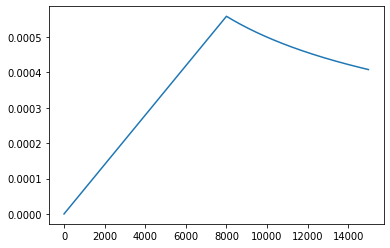

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR

def get_schedule(warmup_steps):
  def lr_schedule(step):
    return 1.0 * np.minimum(1.0, step / warmup_steps) / np.sqrt(np.maximum(step, warmup_steps))

  return lr_schedule

lr=0.05
weight_decay=0.1
warmup=8000


def const_schedule(lr):
  def lr_schedule(step):
    return lr
  return lr_schedule

def training_setup():
  model = model_factory()
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
  schedule_func = get_schedule(warmup)
  #schedule_func = const_schedule(1.0) #<--------- TEMPORARY
  scheduler = LambdaLR(optimizer, schedule_func)

  return model, criterion, optimizer, schedule_func, scheduler

_, _, _, schedule_func, _ = training_setup()

plt.plot([ lr * schedule_func(i) for i in range(15000) ])

In [ ]:
import time

def save_model(model, optimizer, name='/content/drive/MyDrive/Work/Misc/lka-mini-base.tar'):
  torch.save({
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              }, name)

def progress_bar(len, total, current):
  current_scaled = int(round(len * current / total))

  s = '[' + '=' * (current_scaled - 1)
  s += '>' if current != total else '='
  s += '-' * (len - current_scaled) + ']'

  return s

def accuracy(model_output, labels):
  model_output = model_output.argmax(dim=-1)

  return (labels == model_output).float().mean().cpu().numpy()

def train_model(model, name, train_dataset, valid_dataset, optimizer, criterion, scheduler, accumulation_steps, epochs, epoch_len=64, eps = 1e-5, skip_eval=0):
  
  best_acc = 0.0
  train_datagen = iter(train_dataset)
      
  for epoch in range(epochs):  # loop over the dataset multiple times
      
      #epoch start timestamp
      t = time.time()

      running_loss = 0.0
      running_reg  = 0.0
      running_acc  = 0.0

      running_momentum = 0.99

      epoch_loss = [  ]
      epoch_reg  = [  ]
      epoch_acc  = [  ]

      model.train()

      print(f'Epoch {epoch}')

      process_inputs = lambda x: torch.Tensor(x.numpy()).to(torch.int64)

      for i in range(epoch_len):
          # zero the parameter gradients
          optimizer.zero_grad()

          #accumulate gradients for a certain amount of steps
          for k in range(accumulation_steps):
            # get the inputs; data is a list of [inputs, labels]

            try:
              data = next(train_datagen)
            except StopIteration:
              train_datagen = iter(train_dataset)
              data = next(train_datagen)
            except:
              break
            inputs1, inputs2, labels = data['inputs1'], data['inputs2'], data['targets']
            inputs1, inputs2, labels = process_inputs(inputs1), process_inputs(inputs2), process_inputs(labels)
            inputs1, inputs2, labels = inputs1.cuda(), inputs2.cuda(), labels.cuda()

            # forward + backward + optimize
            outputs, additional_losses = model((inputs1, inputs2))
            loss = criterion(outputs + eps, labels)

            if torch.any(torch.isnan(loss)):
              print(loss)
              return None

            additional_losses = sum(additional_losses) if additional_losses else torch.Tensor([ 0.0 ]).cuda()
            ((loss + additional_losses / 2) / accumulation_steps).backward() #multiply by 1/2 since we have a double input

            acc = accuracy(outputs, labels)

            running_loss = running_loss * running_momentum + (1 - running_momentum) * loss.item()
            running_loss_unb = running_loss / (1 - running_momentum ** (i * accumulation_steps + k + 1))

            running_acc  = running_acc  * running_momentum + (1 - running_momentum) * acc
            running_acc_unb = running_acc / (1 - running_momentum ** (i * accumulation_steps + k + 1))

            running_reg  = running_reg  * running_momentum + (1 - running_momentum) * additional_losses.item()
            running_reg_unb = running_reg / (1 - running_momentum ** (i * accumulation_steps + k + 1))

            epoch_loss.append(loss.item())
            epoch_acc.append(acc)
            epoch_reg.append(additional_losses.item())

          optimizer.step()

          pbar = progress_bar(20, epoch_len, i + 1)

          print(f'\r{pbar} {i + 1}/{epoch_len}:', end='')
          print(f' - running_loss: {running_loss_unb:.4f} - running_reg: {running_reg_unb:.6f} - running_acc: {running_acc_unb:.4f} - lr: {scheduler.get_last_lr()[0]:.5f}', end='')

          scheduler.step()
      
      epoch_loss = np.mean(epoch_loss)
      epoch_acc  = np.mean(epoch_acc)
      epoch_reg  = np.mean(epoch_reg)
      
      print(f' - epoch_loss: {epoch_loss:.4f} - epoch_reg: {epoch_reg:.6f} - epoch_acc: {epoch_acc:.4f}', end='')

      epoch_loss, epoch_acc, epoch_reg = [], [], []

      
      if epoch >= skip_eval:
        model.eval()
        valid_dataset.repeat()
        valid_datagen = iter(valid_dataset)

        with torch.no_grad():
          for i, data in enumerate(valid_datagen):

            inputs1, inputs2, labels = data['inputs1'], data['inputs2'], data['targets']
            inputs1, inputs2, labels = process_inputs(inputs1), process_inputs(inputs2), process_inputs(labels)
            inputs1, inputs2, labels = inputs1.cuda(), inputs2.cuda(), labels.cuda()

            outputs, aux_losses = model((inputs1, inputs2))
            loss = criterion(outputs, labels)
            acc = accuracy(outputs, labels)
            aux_losses = sum(aux_losses) if aux_losses else torch.Tensor([ 0.0 ]).cuda()
            aux_losses /= 2 #Doubled input

            epoch_loss.append(loss.item())
            epoch_acc.append(acc)
            epoch_reg.append(aux_losses.item())

        epoch_loss, epoch_acc, epoch_reg = np.mean(epoch_loss), np.mean(epoch_acc), np.mean(epoch_reg)

        if epoch_acc > best_acc:
          best_acc = epoch_acc
          save_model(model, optimizer, name)
      
      else:
        epoch_loss, epoch_acc, epoch_reg = 0.0, 0.0, 0.0

      #epoch computing time
      t = time.time() - t

      print(f' - valid_loss: {epoch_loss:.4f} - valid_reg: {epoch_reg:.6f} - valid_acc: {epoch_acc:.4f} - epoch_time: {t:.4f} s')
 
  checkpoint = torch.load(name)
  return checkpoint

In [ ]:
def test(model, criterion, test_dataset):
  epoch_loss, epoch_acc, epoch_reg = [], [], []

  model.eval()
  test_dataset.repeat()

  process_inputs = lambda x: torch.Tensor(x.numpy()).to(torch.int64)

  t = time.time()

  with torch.no_grad():
    for i, data in enumerate(iter(test_dataset)):
      inputs1, inputs2, labels = data['inputs1'], data['inputs2'], data['targets']
      inputs1, inputs2, labels = process_inputs(inputs1), process_inputs(inputs2), process_inputs(labels)
      inputs1, inputs2, labels = inputs1.cuda(), inputs2.cuda(), labels.cuda()

      outputs, aux_losses = model((inputs1, inputs2))
      loss = criterion(outputs, labels)
      acc = accuracy(outputs, labels)
      aux_losses = sum(aux_losses) if aux_losses else torch.Tensor([ 0.0 ]).cuda()
      aux_losses /= 2 #Doubled input

      epoch_loss.append(loss.item())
      epoch_acc.append(acc)
      epoch_reg.append(aux_losses.item())

  t = time.time() - t

  epoch_loss, epoch_acc, epoch_reg = np.mean(epoch_loss), np.mean(epoch_acc), np.mean(epoch_reg)

  print(f' - test_loss: {epoch_loss:.4f} - test_reg: {epoch_reg:.6f} - test_acc: {epoch_acc:.4f} - test_time: {t:.4f} s')
  return epoch_loss, epoch_reg, epoch_acc

In [ ]:
test_accuracy = [  ]

for i in range(1): ####!!!!!!!!!!!!!!
  path = 'model_to_test_' + str(i) + '.b'

  model, criterion, optimizer, schedule_func, scheduler = training_setup()

  checkpoint = train_model(model, path, train_dataset, valid_dataset, optimizer, criterion, scheduler, accumulation_steps, 75, 200, skip_eval=30)
  model.load_state_dict(checkpoint['model_state_dict'])
  
  _, _, acc = test(model, criterion, test_dataset)
  test_accuracy.append(acc)

test_accuracy = np.mean(test_accuracy)

print(f'\nTotal accuracy: {test_accuracy:.4f}')

Original model 1601538 params, new model 1634306 params, ratio 1.02
Epoch 0
[====================] 200/200: - running_loss: 0.6809 - running_reg: 0.000000 - running_acc: 0.5518 - lr: 0.00001 - epoch_loss: 0.6887 - epoch_reg: 0.000000 - epoch_acc: 0.5377 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 128.0584 s
Epoch 1
[====================] 200/200: - running_loss: 0.6924 - running_reg: 0.000000 - running_acc: 0.5132 - lr: 0.00003 - epoch_loss: 0.6891 - epoch_reg: 0.000000 - epoch_acc: 0.5319 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 121.9133 s
Epoch 2
[====================] 200/200: - running_loss: 0.6892 - running_reg: 0.000000 - running_acc: 0.5354 - lr: 0.00004 - epoch_loss: 0.6922 - epoch_reg: 0.000000 - epoch_acc: 0.5127 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 122.1040 s
Epoch 3
[====================] 200/200: - running_loss: 0.6913 - running_reg: 0.000000 - running_acc: 0.5060 -

In [ ]:
GLU x2: 0.7236

In [ ]:
import torch.nn as nn
import math

class TEmbedding(nn.Module):
  def __init__(self, num_embeddings, hidden_dim, seq_length=1024, padding_idx=0):
    super(TEmbedding, self).__init__()
    
    self.num_embeddings = num_embeddings
    self.hidden_dim=hidden_dim
    self.seq_length = seq_length
    self.padding_idx = padding_idx

    self.embedding = nn.Embedding(num_embeddings, hidden_dim, padding_idx)
    self.pos_embeds  = nn.Parameter(torch.zeros(1, self.seq_length, self.hidden_dim))

    self.cls = nn.Parameter(torch.zeros(1, 1, self.hidden_dim)) #!!!!!!! INIT WITH ANOTHER VALUE IF REQUIRED

  def forward(self, input):
    batch_size, seq_len = input.shape
    
    embed = self.embedding(input)
    embed = embed + self.pos_embeds
    embed = torch.cat([ self.cls.expand(batch_size, 1, -1), embed ], axis=1)

    return embed
    
class TAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(TAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads
    
    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads

    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    q = torch.mul(q, 1. / torch.sqrt(torch.tensor(self.qkv_dim)))

    qk = torch.matmul(q, k.transpose(-1, -2))
    qk = nn.Softmax(dim=-1)(qk)

    def assertion_function(tsr):
      tsr = torch.sum(tsr, axis=-1)
      tsr = tsr - torch.ones_like(tsr)
      return torch.max(torch.abs(tsr)) < 1e-5

    assert assertion_function(qk)

    qk = self.dropout(qk) #Like in TF implementation; could be done before Softmax by random -inf addition

    out = torch.matmul(qk, v)
    out = out.permute(0, 2, 1, 3)

    new_shape = out.shape[:-2] + (self.qkv_dim,)

    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class HWLinear(nn.Module):
  def __init__(self, num_heads, input_dim, output_dim, use_bias):
    super(HWLinear, self).__init__()
    
    self.use_bias = use_bias
    if use_bias:
      self.bias   = nn.Parameter(torch.zeros( (1, num_heads, 1, output_dim)))

    self.weight = nn.Parameter(torch.empty( (num_heads, input_dim, output_dim)))

    def he_init(m):
      s =  np.sqrt( 2. / input_dim )
      m.data.normal_(0, s)

    he_init(self.weight)

  def forward(self, x):
    x = torch.matmul(x, self.weight)
    if self.use_bias:
      x += self.bias
    return x

class Lambda(nn.Module):
  def __init__(self, lambda_, objects=None):
      super(Lambda, self).__init__()
      self.lambda_ = lambda_
      self.objects = objects

  def forward(self, x):
    if self.objects is not None:
      return self.lambda_(self.objects, x)
    return self.lambda_(x)

class LKAAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(LKAAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   = qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    #self.lka = nn.Sequential(
    #  nn.Linear(self.head_dim, self.head_dim), nn.GELU(),
    #  nn.Linear(self.head_dim, self.head_dim), nn.Softplus(beta=2.5),
    #)

    #256, 4, 16, 1024
    #256, 64, 1, 1024
    class AMGOLU(nn.Module):
      def __init__(self, num_heads, qkv_dim, gate_rank, dropout_rate, gate_nonlinearity, kernel_nonlinearity, use_bias=False):
        super(AMGOLU, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads= num_heads
        
        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))

        self.gate_weight_a = HWLinear(num_heads, self.head_dim, gate_rank, use_bias)
        self.gate_weight_b = HWLinear(num_heads, gate_rank, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        forward_info = self.orth_weight(x)
        forward_info = self.kernel_nonlinearity(forward_info)

        gate_info = self.gate_weight_a(x)
        gate_info = self.gate_weight_b(gate_info)
        gate_info = self.gate_nonlinearity(gate_info)

        x = forward_info * gate_info
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    class GatedOrthoKernel(nn.Module):
      def __init__(self, num_heads, qkv_dim, dropout_rate=0.1, gate_nonlinearity=nn.Sigmoid(), kernel_nonlinearity=nn.Identity(), use_bias=False):
        super(GatedOrthoKernel, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads = num_heads

        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))
        self.gate_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        x = self.kernel_nonlinearity(self.orth_weight(x)) * self.gate_nonlinearity(self.gate_weight(x))
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    self.lka = nn.Sequential(
        
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Softplus(), False),
        
        #GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Softplus(), False)

        #Lambda(lambda o, x: (o['act'](x[0]), x[1]), { 'act' : nn.Identity() })
        
    )

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    #BS x HEADS x SEQ x HEAD_DIM
    
    q, _ = self.lka((q, losses))
    k, _ = self.lka((k, losses)) #Use this for var kernel

    q = q / math.sqrt(self.head_dim)
    k = k / math.sqrt(self.head_dim)

    numerator = torch.matmul(k.unsqueeze(-1), v.unsqueeze(-2))
    numerator = numerator.sum(axis=2)
    numerator = torch.matmul(q, numerator)
    
    denominator = k.sum(axis=2).unsqueeze(-1)
    denominator = q.matmul(denominator)

    out = numerator / denominator
    out = out.permute(0, 2, 1, 3)
    
    #TODO: INSERT DROPOUT
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class SimpleAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(SimpleAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.dropout = nn.Dropout(dropout_rate)
    #self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v) #BS x HEADS x SEQ x HEAD_DIM

    _, _, seq_len, _ = q.shape

    kv = torch.matmul(k.transpose(-1, -2), v)
    kv *= 1 / math.sqrt(seq_len)
    kv = self.dropout(kv)

    out = torch.matmul(q, kv)
    #out *= 1 / math.sqrt(self.head_dim)
    out = out.permute(0, 2, 1, 3)
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    #out = self.lin(out)

    return out

class TBlock(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, mlp_dim, num_heads, dropout_rate):
    super(TBlock, self).__init__()

    self.hidden_dim = hidden_dim
    self.qkv_dim  = qkv_dim
    self.mlp_dim  = mlp_dim

    self.layernorm_input = nn.LayerNorm(hidden_dim, eps=1e-6)
    self.layernorm_inter = nn.LayerNorm(hidden_dim, eps=1e-6)

    self.attention = TAttention(hidden_dim, qkv_dim, num_heads, dropout_rate)

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim, mlp_dim), nn.GELU(), nn.Dropout(dropout_rate),
        nn.Linear(mlp_dim, hidden_dim), nn.Dropout(dropout_rate),
    )


  def forward(self, input, losses=[]):
    x = self.layernorm_input(input)
    x = self.attention(x, losses)

    x = input + x

    y = self.layernorm_inter(x)
    x = self.ffn(y) + x

    return x

class DualClassifier(nn.Module):
  def __init__(self, classes, hidden_dim, inter_dim):
    super(DualClassifier, self).__init__()

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim * 2, inter_dim), nn.ReLU(),
        nn.Linear(inter_dim, inter_dim // 2), nn.ReLU(),
    )
    self.output    = nn.Linear(inter_dim // 2, classes)

  def forward(self, x):
    emb_1, emb_2 = x
    x = torch.cat([ emb_1, emb_2 ], dim=-1)
    x = x[:, 0, :]
    x = self.ffn(x)
    logits = self.output(x)

    return logits

class Transformer(nn.Module):
  def __init__(self, classes, num_embeddings, seq_len, hidden_dim, qkv_dim, mlp_dim, num_heads, num_blocks, internal_dropout_rate=0.1):
    super(Transformer, self).__init__()
    
    self.embed_layer = TEmbedding(num_embeddings, hidden_dim, seq_len)
    self.blocks      = nn.ModuleList([ TBlock(hidden_dim, qkv_dim, mlp_dim, num_heads, internal_dropout_rate) for _ in range(num_blocks) ])
    self.classifier  = DualClassifier(classes, hidden_dim, mlp_dim)

  def forward(self, inputs):
    additional_losses = []

    emb_1 = self.embed_layer(inputs[0])
    emb_2 = self.embed_layer(inputs[1])

    for block in self.blocks:
      emb_1 = block(emb_1, additional_losses)
      emb_2 = block(emb_2, additional_losses)
    
    x = self.classifier((emb_1, emb_2))

    return x, additional_losses

Original model 1601538 params, new model 1617922 params, ratio 1.01


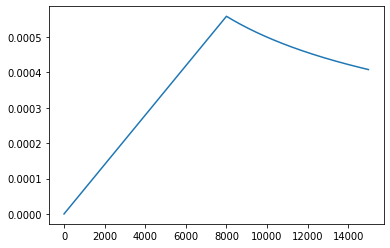

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR

def get_schedule(warmup_steps):
  def lr_schedule(step):
    return 1.0 * np.minimum(1.0, step / warmup_steps) / np.sqrt(np.maximum(step, warmup_steps))

  return lr_schedule

lr=0.05
weight_decay=0.1
warmup=8000


def const_schedule(lr):
  def lr_schedule(step):
    return lr
  return lr_schedule

def training_setup():
  model = model_factory()
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
  schedule_func = get_schedule(warmup)
  #schedule_func = const_schedule(1.0) #<--------- TEMPORARY
  scheduler = LambdaLR(optimizer, schedule_func)

  return model, criterion, optimizer, schedule_func, scheduler

_, _, _, schedule_func, _ = training_setup()

plt.plot([ lr * schedule_func(i) for i in range(15000) ])

In [ ]:
test_accuracy = [  ]

for i in range(1): ####!!!!!!!!!!!!!!
  path = 'model_to_test_' + str(i) + '.b'

  model, criterion, optimizer, schedule_func, scheduler = training_setup()

  checkpoint = train_model(model, path, train_dataset, valid_dataset, optimizer, criterion, scheduler, accumulation_steps, 75, 200, skip_eval=30)
  model.load_state_dict(checkpoint['model_state_dict'])
  
  _, _, acc = test(model, criterion, test_dataset)
  test_accuracy.append(acc)

test_accuracy = np.mean(test_accuracy)

print(f'\nTotal accuracy: {test_accuracy:.4f}')

Original model 1601538 params, new model 1617922 params, ratio 1.01
Epoch 0
[====================] 200/200: - running_loss: 0.6835 - running_reg: 0.000000 - running_acc: 0.5578 - lr: 0.00001 - epoch_loss: 0.6906 - epoch_reg: 0.000000 - epoch_acc: 0.5256 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 104.1449 s
Epoch 1
[====================] 200/200: - running_loss: 0.6901 - running_reg: 0.000000 - running_acc: 0.5432 - lr: 0.00003 - epoch_loss: 0.6853 - epoch_reg: 0.000000 - epoch_acc: 0.5416 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 98.1498 s
Epoch 2
[====================] 200/200: - running_loss: 0.6921 - running_reg: 0.000000 - running_acc: 0.5284 - lr: 0.00004 - epoch_loss: 0.6941 - epoch_reg: 0.000000 - epoch_acc: 0.5078 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 98.6038 s
Epoch 3
[====================] 200/200: - running_loss: 0.6943 - running_reg: 0.000000 - running_acc: 0.4873 - l

In [ ]:
GLU: 0.7217

In [ ]:
import torch.nn as nn
import math

class TEmbedding(nn.Module):
  def __init__(self, num_embeddings, hidden_dim, seq_length=1024, padding_idx=0):
    super(TEmbedding, self).__init__()
    
    self.num_embeddings = num_embeddings
    self.hidden_dim=hidden_dim
    self.seq_length = seq_length
    self.padding_idx = padding_idx

    self.embedding = nn.Embedding(num_embeddings, hidden_dim, padding_idx)
    self.pos_embeds  = nn.Parameter(torch.zeros(1, self.seq_length, self.hidden_dim))

    self.cls = nn.Parameter(torch.zeros(1, 1, self.hidden_dim)) #!!!!!!! INIT WITH ANOTHER VALUE IF REQUIRED

  def forward(self, input):
    batch_size, seq_len = input.shape
    
    embed = self.embedding(input)
    embed = embed + self.pos_embeds
    embed = torch.cat([ self.cls.expand(batch_size, 1, -1), embed ], axis=1)

    return embed
    
class TAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(TAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads
    
    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads

    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    q = torch.mul(q, 1. / torch.sqrt(torch.tensor(self.qkv_dim)))

    qk = torch.matmul(q, k.transpose(-1, -2))
    qk = nn.Softmax(dim=-1)(qk)

    def assertion_function(tsr):
      tsr = torch.sum(tsr, axis=-1)
      tsr = tsr - torch.ones_like(tsr)
      return torch.max(torch.abs(tsr)) < 1e-5

    assert assertion_function(qk)

    qk = self.dropout(qk) #Like in TF implementation; could be done before Softmax by random -inf addition

    out = torch.matmul(qk, v)
    out = out.permute(0, 2, 1, 3)

    new_shape = out.shape[:-2] + (self.qkv_dim,)

    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class HWLinear(nn.Module):
  def __init__(self, num_heads, input_dim, output_dim, use_bias):
    super(HWLinear, self).__init__()
    
    self.use_bias = use_bias
    if use_bias:
      self.bias   = nn.Parameter(torch.zeros( (1, num_heads, 1, output_dim)))

    self.weight = nn.Parameter(torch.empty( (num_heads, input_dim, output_dim)))

    def he_init(m):
      s =  np.sqrt( 2. / input_dim )
      m.data.normal_(0, s)

    he_init(self.weight)

  def forward(self, x):
    x = torch.matmul(x, self.weight)
    if self.use_bias:
      x += self.bias
    return x

class Lambda(nn.Module):
  def __init__(self, lambda_, objects=None):
      super(Lambda, self).__init__()
      self.lambda_ = lambda_
      self.objects = objects

  def forward(self, x):
    if self.objects is not None:
      return self.lambda_(self.objects, x)
    return self.lambda_(x)

class LKAAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(LKAAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   = qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    #self.lka = nn.Sequential(
    #  nn.Linear(self.head_dim, self.head_dim), nn.GELU(),
    #  nn.Linear(self.head_dim, self.head_dim), nn.Softplus(beta=2.5),
    #)

    #256, 4, 16, 1024
    #256, 64, 1, 1024
    class AMGOLU(nn.Module):
      def __init__(self, num_heads, qkv_dim, gate_rank, dropout_rate, gate_nonlinearity, kernel_nonlinearity, use_bias=False):
        super(AMGOLU, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads= num_heads
        
        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))

        self.gate_weight_a = HWLinear(num_heads, self.head_dim, gate_rank, use_bias)
        self.gate_weight_b = HWLinear(num_heads, gate_rank, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        forward_info = self.orth_weight(x)
        forward_info = self.kernel_nonlinearity(forward_info)

        gate_info = self.gate_weight_a(x)
        gate_info = self.gate_weight_b(gate_info)
        gate_info = self.gate_nonlinearity(gate_info)

        x = forward_info * gate_info
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    class GatedOrthoKernel(nn.Module):
      def __init__(self, num_heads, qkv_dim, dropout_rate=0.1, gate_nonlinearity=nn.Sigmoid(), kernel_nonlinearity=nn.Identity(), use_bias=False):
        super(GatedOrthoKernel, self).__init__()

        self.head_dim = qkv_dim // num_heads
        self.num_heads = num_heads

        self.orth_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)
        self.orth_weight.weight = nn.Parameter(torch.stack([ nn.init.orthogonal_(torch.empty((self.head_dim, self.head_dim))) for _ in range(num_heads) ], dim=0))
        self.gate_weight = HWLinear(num_heads, self.head_dim, self.head_dim, use_bias)

        self.kernel_nonlinearity = kernel_nonlinearity
        self.gate_nonlinearity   = gate_nonlinearity

        self.dropout = nn.Dropout(dropout_rate)

      def forward(self, x):
        x, losses = x
        x = self.dropout(x)

        x = self.kernel_nonlinearity(self.orth_weight(x)) * self.gate_nonlinearity(self.gate_weight(x))
        
        loss = torch.eye(self.head_dim, device=self.orth_weight.weight.device).unsqueeze(0).expand(self.num_heads, -1, -1)
        loss = nn.MSELoss()(torch.matmul(self.orth_weight.weight, self.orth_weight.weight.transpose(-1, -2)), loss)
        loss *= LAMBDA

        losses.append(loss)

        return x, losses

    self.lka = nn.Sequential(
        
        AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        AMGOLU(self.num_heads, self.qkv_dim, self.head_dim // 4, dropout_rate, nn.Sigmoid(), nn.Softplus(), False),
        
        #GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Identity(), False),
        #GatedOrthoKernel(self.num_heads, self.qkv_dim, dropout_rate, nn.Sigmoid(), nn.Softplus(), False)

        #Lambda(lambda o, x: (o['act'](x[0]), x[1]), { 'act' : nn.Identity() })
        
    )

    self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

    self.dropout = nn.Dropout(dropout_rate)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v)
    #BS x HEADS x SEQ x HEAD_DIM
    
    q, _ = self.lka((q, losses))
    k, _ = self.lka((k, losses)) #Use this for var kernel

    q = q / math.sqrt(self.head_dim)
    k = k / math.sqrt(self.head_dim)

    numerator = torch.matmul(k.unsqueeze(-1), v.unsqueeze(-2))
    numerator = numerator.sum(axis=2)
    numerator = torch.matmul(q, numerator)
    
    denominator = k.sum(axis=2).unsqueeze(-1)
    denominator = q.matmul(denominator)

    out = numerator / denominator
    out = out.permute(0, 2, 1, 3)
    
    #TODO: INSERT DROPOUT
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    out = self.lin(out)

    return out

class SimpleAttention(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, num_heads, dropout_rate):
    super(SimpleAttention, self).__init__()
    self.hidden_dim=hidden_dim
    self.qkv_dim   =qkv_dim
    self.num_heads =num_heads

    assert not qkv_dim % num_heads
    
    self.head_dim = qkv_dim // num_heads
    
    self.q = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.k = nn.Linear(self.hidden_dim, self.qkv_dim)
    self.v = nn.Linear(self.hidden_dim, self.qkv_dim)

    self.dropout = nn.Dropout(dropout_rate)
    #self.lin = nn.Linear(self.qkv_dim, self.hidden_dim)

  def split_heads(self, x):
    new_shape = x.shape[:-1] + (self.num_heads, self.head_dim)
    x = x.view(* new_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, losses=[]):
    q = self.q(x)
    k = self.k(x)
    v = self.v(x)

    q, k, v = self.split_heads(q), self.split_heads(k), self.split_heads(v) #BS x HEADS x SEQ x HEAD_DIM

    _, _, seq_len, _ = q.shape

    kv = torch.matmul(k.transpose(-1, -2), v)
    kv *= 1 / math.sqrt(seq_len)
    kv = self.dropout(kv)

    out = torch.matmul(q, kv)
    #out *= 1 / math.sqrt(self.head_dim)
    out = out.permute(0, 2, 1, 3)
    
    new_shape = out.shape[:-2] + (self.qkv_dim,)
    out = out.reshape(* new_shape)

    #out = self.lin(out)

    return out

class TBlock(nn.Module):
  def __init__(self, hidden_dim, qkv_dim, mlp_dim, num_heads, dropout_rate):
    super(TBlock, self).__init__()

    self.hidden_dim = hidden_dim
    self.qkv_dim  = qkv_dim
    self.mlp_dim  = mlp_dim

    self.layernorm_input = nn.LayerNorm(hidden_dim, eps=1e-6)
    self.layernorm_inter = nn.LayerNorm(hidden_dim, eps=1e-6)

    self.attention = TAttention(hidden_dim, qkv_dim, num_heads, dropout_rate)

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim, mlp_dim), nn.GELU(), nn.Dropout(dropout_rate),
        nn.Linear(mlp_dim, hidden_dim), nn.Dropout(dropout_rate),
    )


  def forward(self, input, losses=[]):
    x = self.layernorm_input(input)
    x = self.attention(x, losses)

    x = input + x

    y = self.layernorm_inter(x)
    x = self.ffn(y) + x

    return x

class DualClassifier(nn.Module):
  def __init__(self, classes, hidden_dim, inter_dim):
    super(DualClassifier, self).__init__()

    self.ffn       = nn.Sequential(
        nn.Linear(hidden_dim * 2, inter_dim), nn.ReLU(),
        nn.Linear(inter_dim, inter_dim // 2), nn.ReLU(),
    )
    self.output    = nn.Linear(inter_dim // 2, classes)

  def forward(self, x):
    emb_1, emb_2 = x
    x = torch.cat([ emb_1, emb_2 ], dim=-1)
    x = x[:, 0, :]
    x = self.ffn(x)
    logits = self.output(x)

    return logits

class Transformer(nn.Module):
  def __init__(self, classes, num_embeddings, seq_len, hidden_dim, qkv_dim, mlp_dim, num_heads, num_blocks, internal_dropout_rate=0.1):
    super(Transformer, self).__init__()
    
    self.embed_layer = TEmbedding(num_embeddings, hidden_dim, seq_len)
    self.blocks      = nn.ModuleList([ TBlock(hidden_dim, qkv_dim, mlp_dim, num_heads, internal_dropout_rate) for _ in range(num_blocks) ])
    self.classifier  = DualClassifier(classes, hidden_dim, mlp_dim)

  def forward(self, inputs):
    additional_losses = []

    emb_1 = self.embed_layer(inputs[0])
    emb_2 = self.embed_layer(inputs[1])

    for block in self.blocks:
      emb_1 = block(emb_1, additional_losses)
      emb_2 = block(emb_2, additional_losses)
    
    x = self.classifier((emb_1, emb_2))

    return x, additional_losses

Original model 1601538 params, new model 1638402 params, ratio 1.02


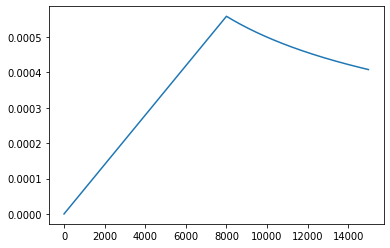

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR

def get_schedule(warmup_steps):
  def lr_schedule(step):
    return 1.0 * np.minimum(1.0, step / warmup_steps) / np.sqrt(np.maximum(step, warmup_steps))

  return lr_schedule

lr=0.05
weight_decay=0.1
warmup=8000


def const_schedule(lr):
  def lr_schedule(step):
    return lr
  return lr_schedule

def training_setup():
  model = model_factory()
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
  schedule_func = get_schedule(warmup)
  #schedule_func = const_schedule(1.0) #<--------- TEMPORARY
  scheduler = LambdaLR(optimizer, schedule_func)

  return model, criterion, optimizer, schedule_func, scheduler

_, _, _, schedule_func, _ = training_setup()

plt.plot([ lr * schedule_func(i) for i in range(15000) ])

In [27]:
test_accuracy = [  ]

for i in range(1): ####!!!!!!!!!!!!!!
  path = 'model_to_test_' + str(i) + '.b'

  model, criterion, optimizer, schedule_func, scheduler = training_setup()

  checkpoint = train_model(model, path, train_dataset, valid_dataset, optimizer, criterion, scheduler, accumulation_steps, 75, 200, skip_eval=30)
  model.load_state_dict(checkpoint['model_state_dict'])
  
  _, _, acc = test(model, criterion, test_dataset)
  test_accuracy.append(acc)

test_accuracy = np.mean(test_accuracy)

print(f'\nTotal accuracy: {test_accuracy:.4f}')

Original model 1601538 params, new model 1638402 params, ratio 1.02
Epoch 0
[====================] 200/200: - running_loss: 0.6814 - running_reg: 0.000000 - running_acc: 0.5745 - lr: 0.00001 - epoch_loss: 0.6898 - epoch_reg: 0.000000 - epoch_acc: 0.5250 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 161.0362 s
Epoch 1
[====================] 200/200: - running_loss: 0.6902 - running_reg: 0.000000 - running_acc: 0.5285 - lr: 0.00003 - epoch_loss: 0.6895 - epoch_reg: 0.000000 - epoch_acc: 0.5250 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 155.2427 s
Epoch 2
[====================] 200/200: - running_loss: 0.6938 - running_reg: 0.000000 - running_acc: 0.4972 - lr: 0.00004 - epoch_loss: 0.6936 - epoch_reg: 0.000000 - epoch_acc: 0.5016 - valid_loss: 0.0000 - valid_reg: 0.000000 - valid_acc: 0.0000 - epoch_time: 155.4205 s
Epoch 3
[====================] 200/200: - running_loss: 0.6952 - running_reg: 0.000000 - running_acc: 0.5122 -